# League of Legends Worlds 2024 - Swiss Stage Stats

## Introduction

In this Notebook, I seek to find insights into League of Legends Champions (A playable character you can play as) that were used in Worlds 2024.

#### This notebook includes the following sections:

1. Relationship between Champions' Presence Rate and Win Rate.
2. Early Game Performance and Match Outcome.
3. Farming Efficiency vs. Game Impact.

## File Information

### The dataset is stored in a CSV file named champions.csv and contains the following columns:

* **Champion**: The name of the champion in the Swiss Stage.
* **Picks**: The number of times each champion was picked during the Swiss Stage matches.
* **Bans**: The number of times each champion was banned, indicating their perceived threat level.
* **Presence**: The percentage of matches where the champion was either picked or banned.
* **Wins**: The total number of games the champion won.
* **Losses**: The total number of games the champion lost.
* **Winrate**: The win percentage calculated from the champion's games.
* **KDA (Kills/Deaths/Assists)**: A performance metric representing how effectively the champion contributes to team fights.
* **Avg BT** (Average Build Time): The average time required for the champion to complete their item build.
* **GT (Game Time)**: The length of time the champion was involved in matches, reported in HH:MM:SS format.
* **CSM (Creep Score per Minute)**: Average number of minions killed per minute, reflecting farming efficiency.
* **DPM (Damage per Minute)**: Average damage dealt by the champion per minute.
* **GPM (Gold per Minute)**: Gold earned by the champion per minute.
* **CSD@15 (Creep Score Difference at 15 minutes)**: Difference in creep score compared to the opposing player by the 15-minute mark.
* **GD@15 (Gold Difference at 15 minutes)**: The difference in gold between the champion and their opponent at the 15-minute mark.
* **XPD@15 (Experience Difference at 15 minutes)**: The experience point difference between the champion and their opponent at the 15-minute mark.

In [504]:
import numpy as np
import pandas as pd
import mlcroissant as mlc
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
# supress warnings (got from stackoverflow)
import warnings
warnings.filterwarnings('ignore')

In [505]:
# Download latest version (from kagglehub)
path = kagglehub.dataset_download(handle="anmatngu/league-of-legends-worlds-2024-swiss-stage-stats")
csv_file_name='champions.csv'

print("Path to dataset files:", path)

Path to dataset files: /Users/jeromedelosreyes/.cache/kagglehub/datasets/anmatngu/league-of-legends-worlds-2024-swiss-stage-stats/versions/2


In [ ]:
df=pd.read_csv(filepath_or_buffer=path + "/" + csv_file_name)
df.head()

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,14,60,96%,9.0,5.0,64%,5.6,3.5,33:36:00,7.6,684.0,394.0,-2.6,-7.0,-94.0
1,Yone,28,45,95%,18.0,10.0,64%,4.3,3.4,32:14:00,9.5,645.0,442.0,5.4,303.0,265.0
2,Skarner,32,35,87%,23.0,9.0,72%,5.7,3.9,32:02:00,5.9,346.0,338.0,-0.8,11.0,82.0
3,Jax,35,28,82%,19.0,16.0,54%,3,5.2,34:25:00,8.0,440.0,402.0,-5.1,38.0,-164.0
4,Ashe,18,43,79%,13.0,5.0,72%,6.2,6.1,33:30:00,9.5,553.0,444.0,-2.8,-156.0,17.0


In [507]:
df.dtypes

Champion     object
Picks         int64
Bans          int64
Presence     object
Wins        float64
Losses      float64
Winrate      object
KDA          object
Avg BT       object
GT           object
CSM         float64
DPM         float64
GPM         float64
CSD@15      float64
GD@15       float64
XPD@15      float64
dtype: object

In [508]:
# cleaning data, removing champions that are not picked or banned in Worlds 2024
# list-wise
df=df.dropna(axis=0)
df.head()

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,14,60,96%,9.0,5.0,64%,5.6,3.5,33:36:00,7.6,684.0,394.0,-2.6,-7.0,-94.0
1,Yone,28,45,95%,18.0,10.0,64%,4.3,3.4,32:14:00,9.5,645.0,442.0,5.4,303.0,265.0
2,Skarner,32,35,87%,23.0,9.0,72%,5.7,3.9,32:02:00,5.9,346.0,338.0,-0.8,11.0,82.0
3,Jax,35,28,82%,19.0,16.0,54%,3,5.2,34:25:00,8.0,440.0,402.0,-5.1,38.0,-164.0
4,Ashe,18,43,79%,13.0,5.0,72%,6.2,6.1,33:30:00,9.5,553.0,444.0,-2.8,-156.0,17.0


In [509]:
# converting 'object' dtype to 'int' or 'float' to easier to work with
df['Presence']=df['Presence'].str.replace('%','').astype(int)
df['Winrate']=df['Winrate'].str.replace('%','').astype(int)
df['KDA']=df['KDA'].str.replace('-','0').astype(float)
df['Avg BT']=df['Avg BT'].str.replace('-','0').astype(float)
df.dtypes

Champion     object
Picks         int64
Bans          int64
Presence      int64
Wins        float64
Losses      float64
Winrate       int64
KDA         float64
Avg BT      float64
GT           object
CSM         float64
DPM         float64
GPM         float64
CSD@15      float64
GD@15       float64
XPD@15      float64
dtype: object

In [510]:
# modified dataset where we can easily manipulate columns
df

,Champion,Picks,Bans,Presence,Wins,Losses,Winrate,KDA,Avg BT,GT,CSM,DPM,GPM,CSD@15,GD@15,XPD@15
0,Aurora,14,60,96,9.0,5.0,64,5.6,3.5,33:36:00,7.6,684.0,394.0,-2.6,-7.0,-94.0
1,Yone,28,45,95,18.0,10.0,64,4.3,3.4,32:14:00,9.5,645.0,442.0,5.4,303.0,265.0
2,Skarner,32,35,87,23.0,9.0,72,5.7,3.9,32:02:00,5.9,346.0,338.0,-0.8,11.0,82.0
3,Jax,35,28,82,19.0,16.0,54,3.0,5.2,34:25:00,8.0,440.0,402.0,-5.1,38.0,-164.0
4,Ashe,18,43,79,13.0,5.0,72,6.2,6.1,33:30:00,9.5,553.0,444.0,-2.8,-156.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Kled,1,0,1,0.0,1.0,0,1.0,0.0,29:06:00,8.5,430.0,344.0,-7.0,-995.0,1.0
85,Senna,1,0,1,0.0,1.0,0,4.0,0.0,32:35:00,1.5,356.0,287.0,12.0,125.0,1067.0
86,Sett,1,0,1,0.0,1.0,0,0.7,0.0,30:12:00,8.7,330.0,361.0,-12.0,-191.0,616.0
87,Lillia,1,0,1,0.0,1.0,0,4.0,0.0,45:40:00,6.7,386.0,347.0,-7.0,-865.0,-495.0


## Relationship between Champions' Presence Rate and Win Rate

54.4%
44.44%


Text(0.5, 1.0, 'Bar Chart of Presence Rate vs. Win Rate')

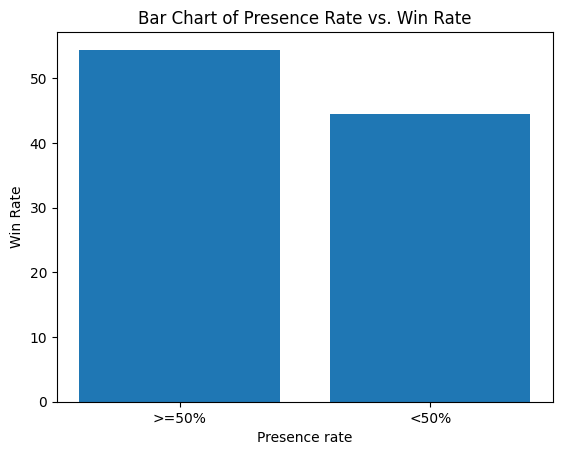

In [511]:
print(f"{round(df[df['Presence']>=50]['Winrate'].mean(),2)}%")
print(f"{round(df[df['Presence']<50]['Winrate'].mean(),2)}%")

data=[round(df[df['Presence']>=50]['Winrate'].mean(),2),round(df[df['Presence']<50]['Winrate'].mean(),2)]
plt.bar(x=['>=50%','<50%'],height=data,label='Presence Rate')
plt.xlabel('Presence rate')
plt.ylabel('Win Rate')
plt.title('Bar Chart of Presence Rate vs. Win Rate')

### Conslusion

Champions with a higher likelihood of being picked or banned tend to perform significantly better, boasting an average win rate of 54.4%. In contrast, champions that are less frequently picked or banned have a considerably lower win rate of just 44.44%.

**Therefore, champions that are often picked or banned are more likely to win games.**

## Early Game Performance and Match Outcome

This section analyses the correlation between early performance, such as having a gold (money) advantage against your opponent lane within 15 minutes, and win rate

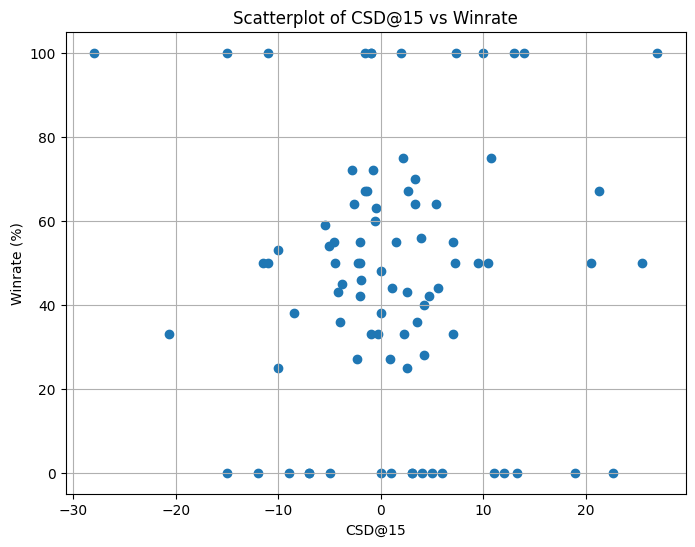

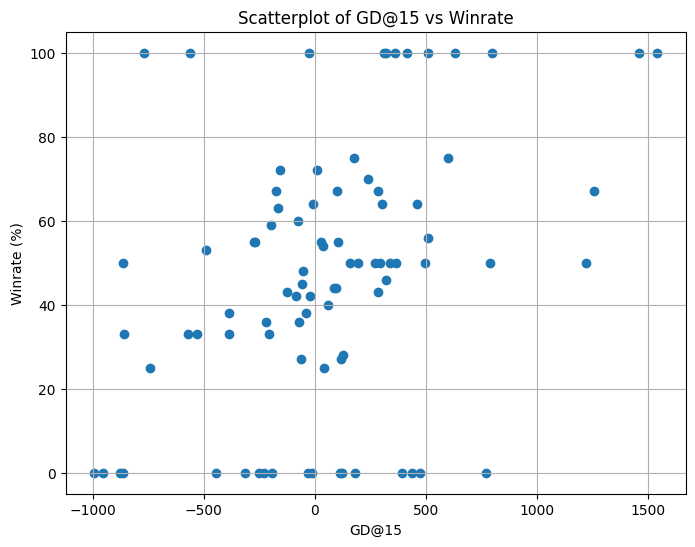

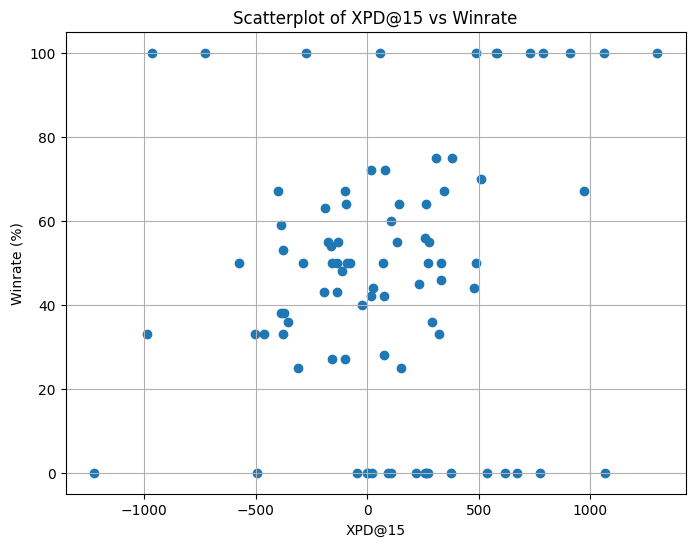

In [512]:
data = ["CSD@15", "GD@15", "XPD@15"]

for stat in data:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[stat], df["Winrate"])
    plt.title(f'Scatterplot of {stat} vs Winrate')
    plt.xlabel(stat)
    plt.ylabel("Winrate (%)")
    plt.grid(True)
    plt.show()

### Conclusion

From the scatterplots, we observe that having a gold advantage within the first 15 minutes does not guarantee victory. While early-game advantages like gold, creep score, or experience can provide a solid foundation, they are not definitive indicators of success in a team-based game like League of Legends.

This is likely due to the dynamic nature of the game, where outcomes depend on multiple factors, such as:

* Team coordination and execution in team fights.
* Strategic decisions, like isolating key opponents or focusing on objectives (e.g., turrets, dragons, or barons).
* Mistakes in positioning or overextending, which can nullify early advantages.

**Ultimately, the game is about leveraging individual advantages for team success, underscoring the importance of synergy, adaptability, and macro-level strategies.**

## Farming Efficiency vs. Game Impact

KeyError: 43

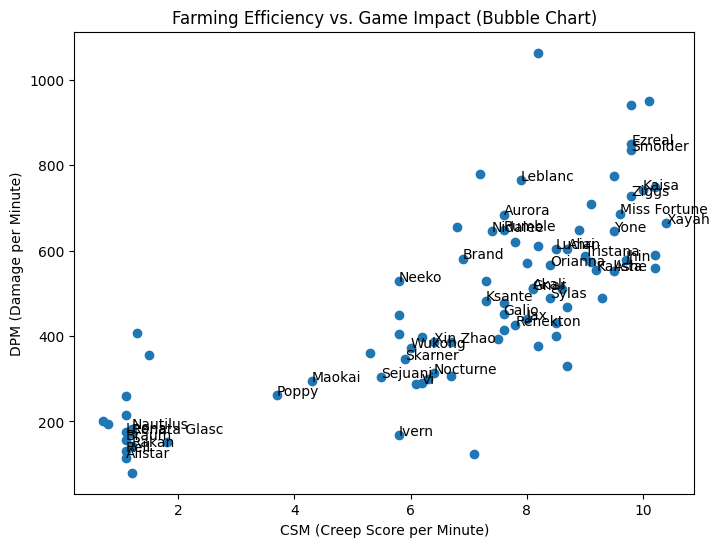

In [513]:
plt.figure(figsize=(8, 6))
plt.scatter(df["CSM"], df["DPM"])
plt.title("Farming Efficiency vs. Game Impact (Bubble Chart)")
plt.xlabel("CSM (Creep Score per Minute)")
plt.ylabel("DPM (Damage per Minute)")

# Annotate champions (ChatGPT generated)
for i, champion in enumerate(df["Champion"]):
    plt.annotate(champion, (df["CSM"][i], df["DPM"][i]))

plt.show()

### Conclusion

Farming efficiency indeed correlates with a greater impact during team fights, as champions with higher CSM (Creep Score per Minute) and GPM (Gold per Minute) often contribute significantly more damage (DPM). However, champions with lower farming efficiency likely play critical roles as supports or tanks, focusing on setting up their damage-dealing teammates for success rather than dealing damage themselves.

These roles prioritize utility, crowd control, and survivability, enabling the team's primary damage dealers to shine. In contrast, high-damage champions typically receive more gold and creep score, reflecting their importance in delivering consistent damage during team fights. This dynamic highlights the balance between resource allocation and role specialization, where success hinges on team synergy and effective execution of roles.

## References

* [LoL Worlds 2024 - Main Event Champion Latest Stats
](https://www.kaggle.com/datasets/anmatngu/league-of-legends-worlds-2024-swiss-stage-stats)